In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('/Users/enrikasoucy/Downloads/archive (13)/INCART 2-lead Arrhythmia Database.csv')

In [3]:
data = data.drop(columns=['record'])

In [4]:
data.head()

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,2,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,5,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,25,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,3,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,34,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [5]:
data.shape

(175729, 33)

In [6]:
type_counts = data['type'].value_counts()

In [7]:
type_names = {
    'N': 'Normal',
    'SVEB': 'Supraventricular ectopic beat',
    'VEB': 'Ventricular ectopic beat',
    'F': 'Fusion beat',
    'Q': 'Unknown beat'
}

In [8]:
print("Counts of Each Type:")
for type_code, count in type_counts.items():
    print(f"{type_names[type_code]}: {count}")

Counts of Each Type:
Normal: 153546
Ventricular ectopic beat: 20000
Supraventricular ectopic beat: 1958
Fusion beat: 219
Unknown beat: 6


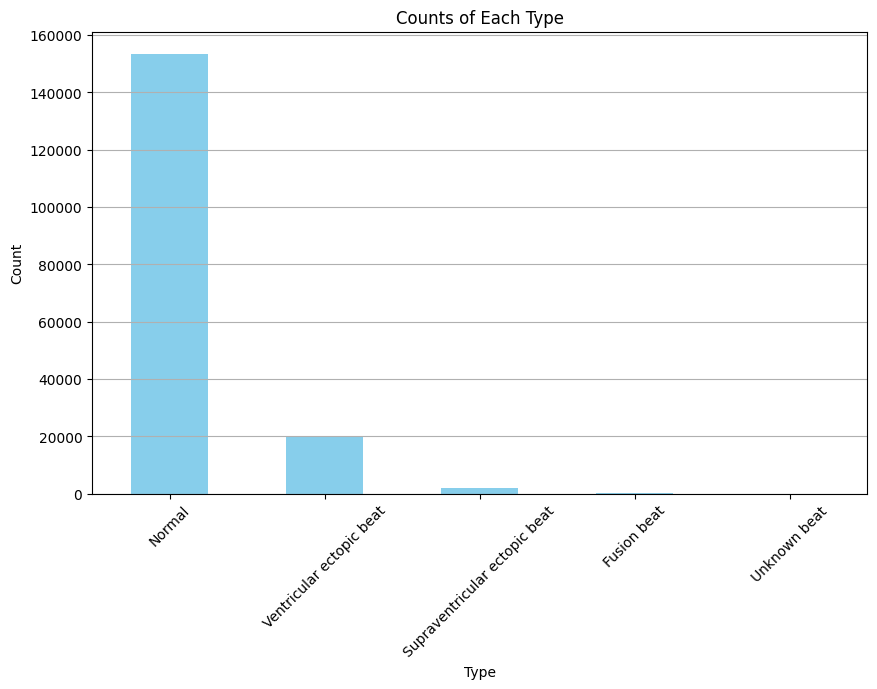

In [9]:
type_counts.index = type_counts.index.map(type_names)

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [10]:
X = data.drop('type', axis=1)
y = data['type']

In [11]:
type_mapping = {'N': 0, 'SVEB': 1, 'VEB': 2, 'F': 3, 'Q': 4}
y = y.map(type_mapping)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [16]:
subset_size = 1000
X_train_subsample = X_train_resampled[:subset_size]
y_train_subsample = y_train_resampled[:subset_size]

In [17]:
model = RandomForestClassifier(random_state=101, n_estimators=50)
# model.fit(X_train_subsample, y_train_subsample)

In [ ]:
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# print("*** Confusion Matrix ***")
# print(confusion_matrix(y_test, y_pred))
# print("*** Classification Report ***")
# print(classification_report(y_test, y_pred, target_names=list(type_names.values())))


In [18]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_subsample, y_train_subsample, cv=cv, scoring='accuracy')
print("Cross-val scores: ", scores)
print("Avg cross-val score: ", scores.mean())

/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-val scores:  [0.98  0.98  0.975 0.955 0.98 ]
Avg cross-val score:  0.974


In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_subsample, y_train_subsample)

print("Best params: ", grid_search.best_params_)
print("Best cross-val score: ", grid_search.best_score_)

/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best params:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-val score:  0.9789999999999999


In [20]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_subsample, y_train_subsample)

RandomForestClassifier(min_samples_leaf=2, random_state=101)

In [24]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("*** Confusion Matrix ***")
print(confusion_matrix(y_test, y_pred))
print("*** Classification Report ***")
print(classification_report(y_test, y_pred, target_names=list(type_names.values())))

Accuracy: 0.978575086780857
*** Confusion Matrix ***
[[30656     0    53     0     0]
 [  317    39    36     0     0]
 [  302     0  3698     0     0]
 [   22     0    22     0     0]
 [    1     0     0     0     0]]
*** Classification Report ***
                               precision    recall  f1-score   support

                       Normal       0.98      1.00      0.99     30709
Supraventricular ectopic beat       1.00      0.10      0.18       392
     Ventricular ectopic beat       0.97      0.92      0.95      4000
                  Fusion beat       0.00      0.00      0.00        44
                 Unknown beat       0.00      0.00      0.00         1

                     accuracy                           0.98     35146
                    macro avg       0.59      0.40      0.42     35146
                 weighted avg       0.98      0.98      0.97     35146



/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [22]:
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_subsample, y_train_subsample, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

/Users/enrikasoucy/.pyenv/versions/3.10.6/envs/heart-beat-decoder/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


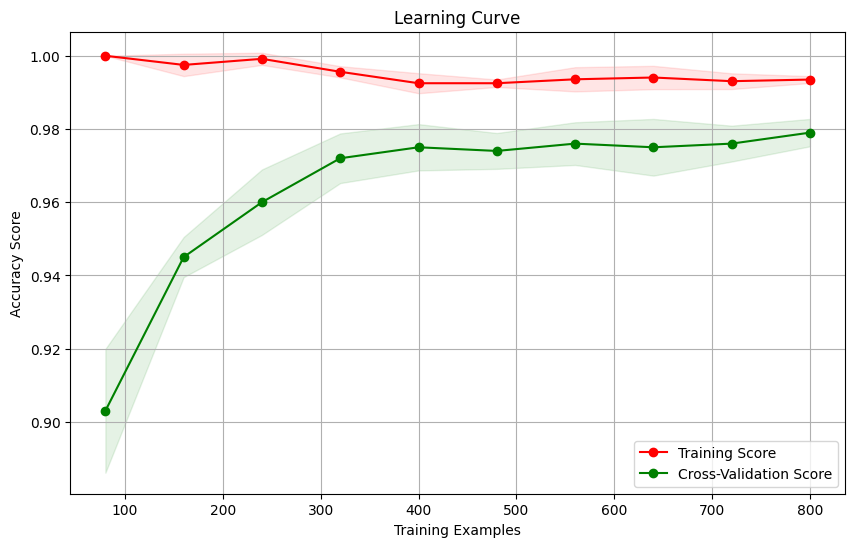

In [23]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()